In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam, RMSprop, SGD
from keras.initializers import glorot_uniform, he_normal
from keras.callbacks import EarlyStopping

In [2]:
import os
os.chdir("/content/drive/My Drive/Stock Algorithim/runAlgo")

In [3]:
# Download historical stock data
ticker_symbol = "SPY"
start_date = "2010-01-01"
end_date = "2022-01-01"
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the closing prices
df = data[['Close']].copy()

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Normalize the data
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create sequences of historical data for training (lookback of 5 days)
sequence_length = 5  # Number of previous days to use for prediction
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df['Close'].iloc[i : i + sequence_length].values)
    y.append(df['Close'].iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [9]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
def create_model(neurons, optimizer, num_layers, activation, dropout_rate,learning_rate):
    # Define the model as sequential
    model = keras.Sequential()

    # Adding the input layer
    model.add(layers.LSTM(neurons, activation=activation,return_sequences=True, input_shape=(sequence_length, 1)))

    # Loop through the provided number of layers and add layers
    for _ in range(num_layers - 2):  # num_layers - 4 because of the input layer and final
        model.add(layers.LSTM(neurons, activation=activation, return_sequences=True))
       # model.add(Dropout(dropout_rate))

    # The last LSTM layer (no return_sequences=True)
    #model.add(LSTM(neurons, activation=activation, return_sequences=False))
  #  model.add(Dropout(dropout_rate))

    # Add a Dense layer with appropriate units and activation
    #model.add(Dense(neurons/2))

    model.add(layers.Dense(1))

    # Define optimizer with custom learning rate if needed
    if optimizer == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)


    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [20]:
model = create_model(60,'SGD',5,'relu','0.2',0.01)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=1)

Epoch 1/30
2412/2412 [==============================] - 29s 11ms/step - loss: 0.0228 - accuracy: 4.1459e-04
Epoch 2/30
2412/2412 [==============================] - 23s 10ms/step - loss: 0.0221 - accuracy: 4.1459e-04
Epoch 3/30
2412/2412 [==============================] - 23s 10ms/step - loss: 0.0220 - accuracy: 4.1459e-04
Epoch 4/30
2412/2412 [==============================] - 25s 10ms/step - loss: 0.0220 - accuracy: 4.1459e-04
Epoch 5/30
2412/2412 [==============================] - 38s 16ms/step - loss: 0.0219 - accuracy: 4.1459e-04
Epoch 6/30
2412/2412 [==============================] - 25s 10ms/step - loss: 0.0219 - accuracy: 4.1459e-04
Epoch 7/30
2412/2412 [==============================] - 22s 9ms/step - loss: 0.0219 - accuracy: 4.1459e-04
Epoch 8/30
2412/2412 [==============================] - 24s 10ms/step - loss: 0.0219 - accuracy: 4.1459e-04
Epoch 9/30
2412/2412 [==============================] - 22s 9ms/step - loss: 0.0218 - accuracy: 4.1459e-04
Epoch 10/30
2412/2412 [=======

In [ ]:
model.save('Models/lstm(11-5).keras')

In [ ]:
from keras.models import load_model
model = load_model('Models/lstm(11-3).keras')

In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

19/19 [==============================] - 1s 4ms/step - loss: 4.8614e-04
Test Loss: 0.00048614165280014277


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling to get real prices
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

19/19 [==============================] - 1s 3ms/step


In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=test_data["Close"],
    mode='lines',
    name='Test Data'
))
fig.update_layout(title="Model Predictions LSTM")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(train_data.index),
    y=train_data["Close"],
    mode='lines',
    name='Train Data'
))
fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=y_RNN_O,
    mode='lines',
    name='LSTM prediction'
))

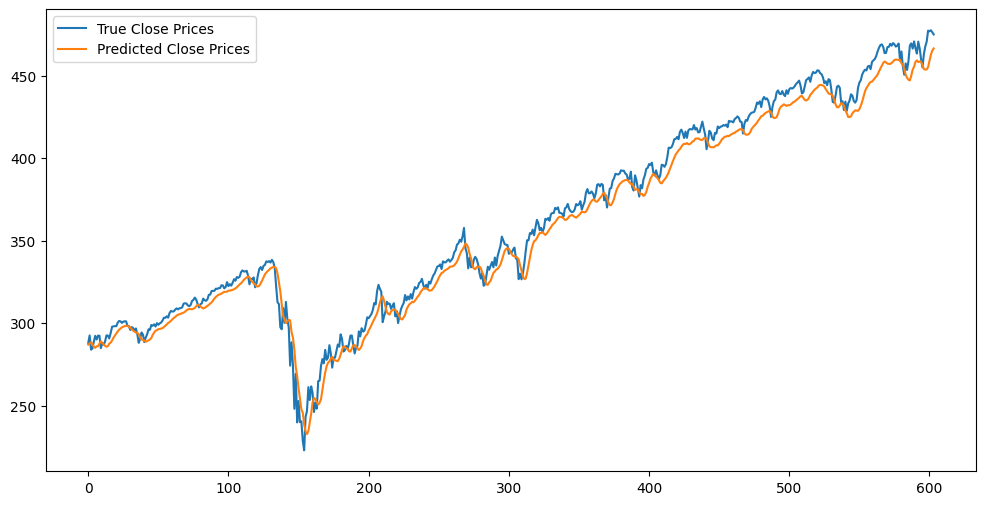

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="True Close Prices")
plt.plot(y_pred, label="Predicted Close Prices")
plt.legend()
plt.show()


In [ ]:
!cp Methods/atulysismethods.py /content
import atulysismethods as am

In [ ]:
_,CompHoldouts = am.compReturnsByHoldout(y_pred,y_test,30)

In [ ]:
AccHoldout = am.accuracyByHoldout(30,y_pred,y_test)

In [ ]:
AccHoldout.head(4)

,Holdout,Accuracy
17,18,0.969697
19,20,0.966667
28,29,0.950000
13,14,0.930233


In [ ]:
CompHoldouts.head(4)

,Holdout,Comp Returns
10,11,4.837166
6,7,4.800296
13,14,4.715018
7,8,4.262508
